In [19]:
# Mašininis mokymasis

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# import sqlite3
# import mysql.connector as cnt
# import plotly.express as px
import pandas as pd
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, cross_val_score
from Skriptai.manofunkcijos import *
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

In [ ]:
# Esimo įvykių statistikos duomenys : https://data.gov.lt/datasets/509/ ; 
# Pritaikyti ML jog nustatytumėte, ar tai buvo susidūrimas su gyvūnu? 
# Ar galite nustatyti kaltininko lytį, pagal pateiktas eismo įvykio aplinkybes? 
# Hipotezė - vyrai daro daugiau vienos rūšies klaidų, moterys - kitos.

In [14]:
# iv2013 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2013_12_31.json')
# iv2014 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2014_12_31.json')
# iv2015 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2015_12_31.json')
# iv2016 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2016_12_31.json')
# iv2017 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2017_12_31.json')
# iv2018 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2018_12_31.json')
# iv2019 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2019_12_31.json')
# iv2020 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2020_12_31.json')
# iv2021 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2021_12_31.json')
# iv2022 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2022_12_31.json')
# iv2023 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2023_12_31.json')
s_of_dfs = [iv2013,iv2014,iv2015,iv2016,iv2017,iv2018,iv2019,iv2020,iv2021,iv2022,iv2023]
ivykiai = pd.concat(s_of_dfs)

In [15]:
ivykiai['dataLaikas'] = pd.to_datetime(ivykiai['registravimoData'])
ivykiai['Metai'] = ivykiai['dataLaikas'].dt.year

In [16]:
ivykiai

,registrokodas,dataLaikas,registravimoData,paskutinioRedagavimoLaikas,iskaitinis,rusis,schema1,schema2,dalyviuSkaicius,zuvusiuSkaicius,...,privalomasLeistinasGreitis,leistinasGreitis,neblaivusKaltininkai,apsvaigeKaltininkai,atsisakeTikrintisKaltininkai,ilguma,platuma,eismoDalyviai,eismoTranspPreimone,Metai
0,07-13-7271255,2013-01-01 00:02:00,2013-01-01 00:02,2013-03-14 10:04,0,Kiti eismo įvykiai,Kiti eismo įvykiai,Susidūrimas su stovinčia TP,2.0,0,...,1,20.0,None,None,None,NaN,NaN,"[{'dalyvisId': 22897970, 'kategorija': 'Automo...","[{'tpId': 19801434, 'regValstybe': 'Lietuva', ...",2013
1,07-13-7271259,2013-01-01 01:26:00,2013-01-01 01:26,2013-03-14 10:01,0,Susidūrimas,Kiti susidūrimai,Kiti susidūrimai,2.0,0,...,1,20.0,None,None,None,NaN,NaN,"[{'dalyvisId': 22897891, 'kategorija': 'Automo...","[{'tpId': 19801407, 'regValstybe': None, 'kate...",2013
2,07-13-7271001,2013-01-01 02:26:00,2013-01-01 02:26,2013-01-01 02:11,0,Užvažiavimas ant gyvūno,Kiti susidūrimai,Kiti susidūrimai,1.0,0,...,1,100.0,None,None,None,NaN,NaN,"[{'dalyvisId': 21794565, 'kategorija': 'Automo...","[{'tpId': 19226309, 'regValstybe': 'Lietuva', ...",2013
3,07-13-7271276,2013-01-01 03:27:00,2013-01-01 03:27,2013-03-14 10:01,0,Užvažiavimas ant gyvūno,Kiti susidūrimai,Kiti susidūrimai,2.0,0,...,1,50.0,None,None,None,NaN,NaN,"[{'dalyvisId': 22897876, 'kategorija': 'Automo...","[{'tpId': 19801349, 'regValstybe': 'Lietuva', ...",2013
4,07-13-7271354,2013-01-01 03:49:00,2013-01-01 03:49,2013-07-30 15:23,0,Susidūrimas su stovinčia transporto priemone,Kiti eismo įvykiai,Kiti eismo įvykiai,2.0,0,...,1,20.0,None,None,None,NaN,NaN,"[{'dalyvisId': 24796989, 'kategorija': 'Automo...","[{'tpId': 21000436, 'regValstybe': 'Lietuva', ...",2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24235,07-23-9613407,2023-12-31 20:37:00,2023-12-31 20:37,2023-12-31 21:01,0,Užvažiavimas ant gyvūno,Kiti eismo įvykiai,Užvažiavimas ant gyvūno,1.0,0,...,1,50.0,Ne,Ne,Ne,6106928.0,516738.0,"[{'dalyvisId': 49086534, 'kategorija': 'Automo...","[{'tpId': 33932683, 'regValstybe': 'Lietuva', ...",2023
24236,07-23-9613408,2023-12-31 21:32:00,2023-12-31 21:32,2023-12-31 21:45,0,Užvažiavimas ant gyvūno,Kiti eismo įvykiai,Užvažiavimas ant gyvūno,1.0,0,...,1,110.0,Ne,Ne,Ne,6076033.0,573738.0,"[{'dalyvisId': 49086564, 'kategorija': 'Automo...","[{'tpId': 33932701, 'regValstybe': 'Lietuva', ...",2023
24237,07-23-9613409,2023-12-31 21:47:00,2023-12-31 21:47,2024-01-08 10:32,0,Susidūrimas su stovinčia transporto priemone,Kiti eismo įvykiai,Kiti eismo įvykiai,2.0,0,...,1,50.0,Ne,Ne,Ne,6069714.0,581924.0,"[{'dalyvisId': 49094163, 'kategorija': 'Automo...","[{'tpId': 33936715, 'regValstybe': 'Lietuva', ...",2023
24238,07-23-9613410,2023-12-31 22:40:00,2023-12-31 22:40,2024-03-06 11:01,0,Susidūrimas,Susidūrimai judant ta pačia kryptimi,Šoninis susidūrimas,2.0,0,...,1,50.0,Ne,Ne,Ne,6061478.0,581565.0,"[{'dalyvisId': 49159858, 'kategorija': 'Automo...","[{'tpId': 33971728, 'regValstybe': 'Lietuva', ...",2023


In [91]:
eil = ivykiai[:1]['eismoDalyviai'] 
print(eil[0][1]['kaltininkas'])
def kalt_lytis(x):
    if x != None:
        # try:
            dalyviai = x
            for dalyvis in dalyviai:
                if dalyvis['kaltininkas'] == 'Taip':
                    lytis = dalyvis['lytis']
                    if lytis != 'Nežinoma':
                        return lytis
        # except Exception as e:
            # print(e)

Ne


In [63]:
kalt_lytis(ivykiai['eismoDalyviai'].values[0])

In [92]:
ivykiai['lytis'] = ivykiai['eismoDalyviai'].apply(kalt_lytis)

In [193]:
check_df = ivykiai[['rusis', 'schema1', 'schema2', 'dalyviuSkaicius', 'zuvusiuSkaicius', 'suzeistuSkaicius', 'tpSkaicius', 'apgadintuTpSkaicius', 'dangosRusis', 'dangosBukle', 'parosMetas', 'meteoSalygos', 'kelioGatvesKreive', 'atitvarai', 'leistinasGreitis', 'neblaivusKaltininkai', 'apsvaigeKaltininkai', 'atsisakeTikrintisKaltininkai', 'eismoDalyviai']]
check_df.dropna(inplace=True)

In [194]:
def gyvun(x):
    if x == 'Užvažiavimas ant gyvūno':
        return True
    else:
        return False

In [195]:
check_df['Gyvunas'] = check_df['schema2'].apply(gyvun)

In [196]:
ndf = check_df
l2 = LabelEncoder().fit_transform(ndf['dangosRusis'])
l2_dict = dict(zip(ndf['dangosRusis'],l2))
l3 = LabelEncoder().fit_transform(ndf['dangosBukle'])
l3_dict = dict(zip(ndf['dangosBukle'],l3))
l4 = LabelEncoder().fit_transform(ndf['parosMetas'])
l4_dict = dict(zip(ndf['parosMetas'],l4))
l5 = LabelEncoder().fit_transform(ndf['meteoSalygos'])
l5_dict = dict(zip(ndf['meteoSalygos'],l5))
l6 = LabelEncoder().fit_transform(ndf['kelioGatvesKreive'])
l6_dict = dict(zip(ndf['kelioGatvesKreive'],l6))
l7 = LabelEncoder().fit_transform(ndf['atitvarai'])
l7_dict = dict(zip(ndf['atitvarai'],l7))
l8 = LabelEncoder().fit_transform(ndf['neblaivusKaltininkai'])
l8_dict = dict(zip(ndf['neblaivusKaltininkai'],l8))
l9 = LabelEncoder().fit_transform(ndf['apsvaigeKaltininkai'])
l9_dict = dict(zip(ndf['apsvaigeKaltininkai'],l9))
l10 = LabelEncoder().fit_transform(ndf['atsisakeTikrintisKaltininkai'])
l10_dict = dict(zip(ndf['atsisakeTikrintisKaltininkai'],l10))
# l11 = LabelEncoder().fit_transform(ndf['lytis'])
# l11_dict = dict(zip(ndf['lytis'],l11))
l12 = LabelEncoder().fit_transform(ndf['rusis'])
l12_dict = dict(zip(ndf['rusis'],l12))
l13 = LabelEncoder().fit_transform(ndf['schema1'])
l13_dict = dict(zip(ndf['schema1'],l13))
l14 = LabelEncoder().fit_transform(ndf['schema2'])
l14_dict = dict(zip(ndf['schema2'],l14))



ndf['dangosRusis'] = l2
ndf['dangosBukle'] = l3
ndf['parosMetas'] = l4
ndf['meteoSalygos'] = l5
ndf['kelioGatvesKreive'] = l6
ndf['atitvarai'] = l7
ndf['neblaivusKaltininkai'] = l8
ndf['apsvaigeKaltininkai'] = l9
ndf['atsisakeTikrintisKaltininkai'] = l10
# ndf['lytis'] = l11
ndf['rusis'] = l12
ndf['schema1'] = l13
ndf['schema2'] = l14

In [ ]:
ndf

In [197]:
X = ndf.drop(columns=['rusis','schema1', 'schema2', 'eismoDalyviai', 'Gyvunas'])
y = ndf['Gyvunas']

In [198]:
X_train, X_test,\
y_train, y_test = train_test_split(X, y,
test_size=0.20,
random_state=23)

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 86.59854914418472


<Axes: >

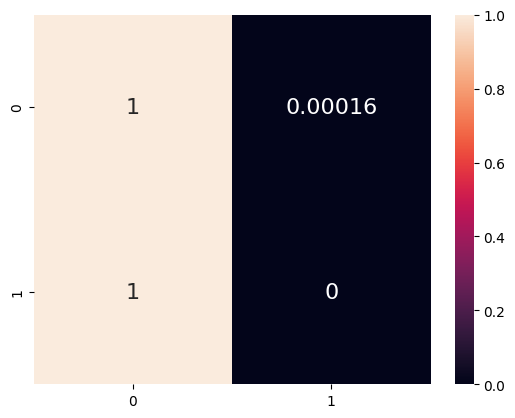

In [142]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':16})

In [143]:
X = ndf.drop(columns=['eismoDalyviai', 'lytis', 'Gyvunas'])
y = ndf['lytis']

In [144]:
set(ivykiai['lytis'])


{'Moteris', None, 'Vyras'}

In [145]:
X_train, X_test,\
y_train, y_test = train_test_split(X, y,
test_size=0.20,
random_state=23)

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 76.39932344727217


<Axes: >

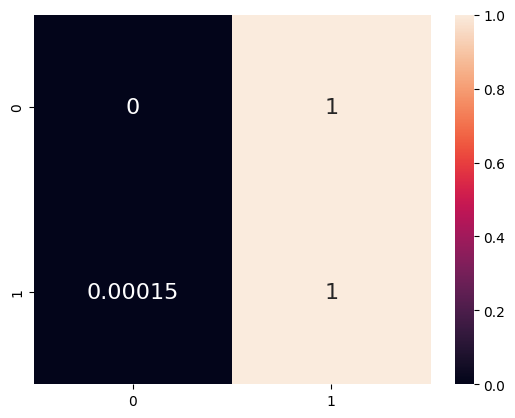

In [146]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':16})

In [166]:
ndf = check_df
l2 = LabelEncoder().fit_transform(ndf['dangosRusis'])
l2_dict = dict(zip(ndf['dangosRusis'],l2))
l3 = LabelEncoder().fit_transform(ndf['dangosBukle'])
l3_dict = dict(zip(ndf['dangosBukle'],l3))
l4 = LabelEncoder().fit_transform(ndf['parosMetas'])
l4_dict = dict(zip(ndf['parosMetas'],l4))
l5 = LabelEncoder().fit_transform(ndf['meteoSalygos'])
l5_dict = dict(zip(ndf['meteoSalygos'],l5))
l6 = LabelEncoder().fit_transform(ndf['kelioGatvesKreive'])
l6_dict = dict(zip(ndf['kelioGatvesKreive'],l6))
l7 = LabelEncoder().fit_transform(ndf['atitvarai'])
l7_dict = dict(zip(ndf['atitvarai'],l7))
l8 = LabelEncoder().fit_transform(ndf['neblaivusKaltininkai'])
l8_dict = dict(zip(ndf['neblaivusKaltininkai'],l8))
l9 = LabelEncoder().fit_transform(ndf['apsvaigeKaltininkai'])
l9_dict = dict(zip(ndf['apsvaigeKaltininkai'],l9))
l10 = LabelEncoder().fit_transform(ndf['atsisakeTikrintisKaltininkai'])
l10_dict = dict(zip(ndf['atsisakeTikrintisKaltininkai'],l10))
l11 = LabelEncoder().fit_transform(ndf['lytis'])
l11_dict = dict(zip(ndf['lytis'],l11))
l12 = LabelEncoder().fit_transform(ndf['rusis'])
l12_dict = dict(zip(ndf['rusis'],l12))
l13 = LabelEncoder().fit_transform(ndf['schema1'])
l13_dict = dict(zip(ndf['schema1'],l13))
l14 = LabelEncoder().fit_transform(ndf['schema2'])
l14_dict = dict(zip(ndf['schema2'],l14))



ndf['dangosRusis_enc'] = l2
ndf['dangosBukle_enc'] = l3
ndf['parosMetas_enc'] = l4
ndf['meteoSalygos_enc'] = l5
ndf['kelioGatvesKreive_enc'] = l6
ndf['atitvarai_enc'] = l7
ndf['neblaivusKaltininkai_enc'] = l8
ndf['apsvaigeKaltininkai_enc'] = l9
ndf['atsisakeTikrintisKaltininkai_enc'] = l10
ndf['lytis_enc'] = l11
ndf['rusis_enc'] = l12
ndf['schema1_enc'] = l13
ndf['schema2_enc'] = l14

In [ ]:
ndf

In [159]:
X = ndf.drop(columns=['eismoDalyviai', 'lytis', 'Gyvunas', 'dangosRusis', 'dangosBukle', 'parosMetas', 'meteoSalygos', 'kelioGatvesKreive', 'atitvarai', 'neblaivusKaltininkai', 'apsvaigeKaltininkai', 'atsisakeTikrintisKaltininkai', 'lytis', 'rusis', 'schema1', 'schema2', 'lytis_enc'])
y = ndf['lytis_enc']

In [160]:
X_train, X_test,\
y_train, y_test = train_test_split(X, y,
test_size=0.20,
random_state=23)

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 76.40325689336429


In [162]:
print(y_test[:5])

3025     1
19436    1
274      1
19724    1
9744     1
Name: lytis_enc, dtype: int64


In [167]:
y_test_withlabels = ['Vyras' if x == 1 else "Moteris" for x in y_test]

In [168]:
y_pred_withlabels = ['Vyras' if x == 1 else "Moteris" for x in y_pred]

In [170]:
set(y_test_withlabels)

{'Moteris', 'Vyras'}

In [171]:
set(y_pred_withlabels)

{'Moteris', 'Vyras'}

<Axes: >

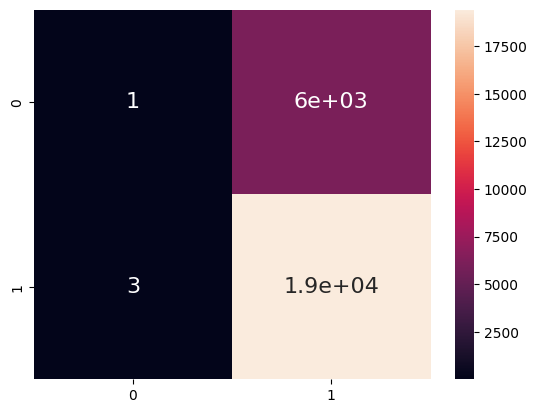

In [172]:
import seaborn as sns
cm = confusion_matrix(y_test_withlabels, y_pred_withlabels)
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':16})

<Axes: >

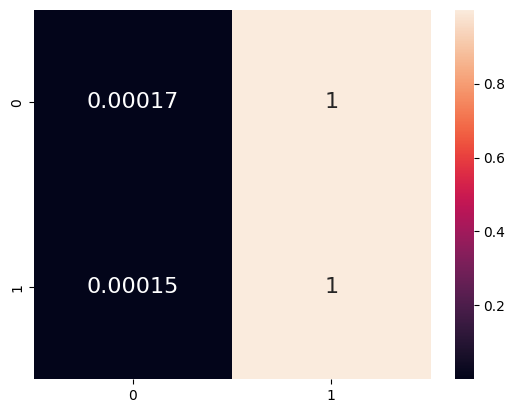

In [161]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':16})

In [ ]:
ndf

In [151]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127113 entries, 7210 to 24239
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   dalyviuSkaicius                   127113 non-null  float64
 1   zuvusiuSkaicius                   127113 non-null  int64  
 2   suzeistuSkaicius                  127113 non-null  int64  
 3   tpSkaicius                        127113 non-null  float64
 4   apgadintuTpSkaicius               127113 non-null  float64
 5   leistinasGreitis                  127113 non-null  float64
 6   dangosRusis_enc                   127113 non-null  int64  
 7   dangosBukle_enc                   127113 non-null  int64  
 8   parosMetas_enc                    127113 non-null  int64  
 9   meteoSalygos_enc                  127113 non-null  int64  
 10  kelioGatvesKreive_enc             127113 non-null  int64  
 11  atitvarai_enc                     127113 non-null  int6

In [ ]:
# rep = True
# if rep:
#     try:
#         rep = True
#         x = np.nan
#         miestas = np.nan
#         irengimas = np.nan     
#         sildymo_tipas = np.nan
#         pastato_tipas = np.nan
#         plotas = np.nan
#         metai = np.nan
#         kambariai = np.nan
#         aukstas = np.nan
#         aukstai = np.nan
#         m = input('Nurodykite buto miestą')
#         miestas = l2_dict[m]
#         print(m, miestas)
#         i = input(f'Įveskite vieną iš įrengimo variantų, variantai: {list(set(l3_dict.keys()))}')
#         irengimas = l3_dict[i]
#         print(i, irengimas)
#         s = input(f'Įveskite vieną iš šildymo tipų variantų, variantai: {list(set(l4_dict.keys()))}')
#         sildymo_tipas = l4_dict[s]
#         print(s, sildymo_tipas)
#         p = input(f'Įveskite vieną iš pastato tipų variantų, variantai: {list(set(l5_dict.keys()))}')
#         pastato_tipas = l5_dict[p]
#         print(p, pastato_tipas)
#         plotas = float(input('Nurodykite buto plotą'))
#         print(plotas)
#         metai = int(input('Nurodykite buto metus'))
#         print(metai)
#         kambariai = int(input('Nurodykite buto kambarių skaičių'))
#         print(kambariai)
#         aukstas = int(input('Nurodykite buto aukštą'))
#         print(aukstas)
#         aukstai = int(input('Nurodykite daugiabučio aukštų skaičių'))
#         print(aukstai)
#         rep = False
#     except Exception as e:
#         print(e)
    
# x = fit.predict(np.reshape([miestas,irengimas, sildymo_tipas, pastato_tipas, plotas, metai, kambariai, aukstas, aukstai], (1,-1)))[0]
# print(f'{round(x,0)} EUR')

In [152]:
l11_dict.keys()

dict_keys([0, 1])

In [153]:
s = y_pred
spejimai = pd.Series(data=s, name='Spėjimai')
res = pd.concat([y_test.reset_index(drop=True), spejimai], axis = 1); res.head()

,lytis,Spėjimai
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [154]:
lytys = res['lytis']
spejimai = res['Spėjimai']
ats = []
for l,s in zip (lytys,spejimai):
    if l == s:
        ats.append(True)
    else:
        ats.append(False)

In [155]:
atsakymai = pd.Series(data=ats, name='Atspėta')
# nres = pd.concat([res; atsakymai], axis=1)

In [157]:
X.columns

Index(['dalyviuSkaicius', 'zuvusiuSkaicius', 'suzeistuSkaicius', 'tpSkaicius',
       'apgadintuTpSkaicius', 'leistinasGreitis', 'dangosRusis_enc',
       'dangosBukle_enc', 'parosMetas_enc', 'meteoSalygos_enc',
       'kelioGatvesKreive_enc', 'atitvarai_enc', 'neblaivusKaltininkai_enc',
       'apsvaigeKaltininkai_enc', 'atsisakeTikrintisKaltininkai_enc',
       'lytis_enc', 'rusis_enc', 'schema1_enc', 'schema2_enc'],
      dtype='object')

In [158]:
ndf.columns

Index(['rusis', 'schema1', 'schema2', 'dalyviuSkaicius', 'zuvusiuSkaicius',
       'suzeistuSkaicius', 'tpSkaicius', 'apgadintuTpSkaicius', 'dangosRusis',
       'dangosBukle', 'parosMetas', 'meteoSalygos', 'kelioGatvesKreive',
       'atitvarai', 'leistinasGreitis', 'neblaivusKaltininkai',
       'apsvaigeKaltininkai', 'atsisakeTikrintisKaltininkai', 'eismoDalyviai',
       'lytis', 'Gyvunas', 'dangosRusis_enc', 'dangosBukle_enc',
       'parosMetas_enc', 'meteoSalygos_enc', 'kelioGatvesKreive_enc',
       'atitvarai_enc', 'neblaivusKaltininkai_enc', 'apsvaigeKaltininkai_enc',
       'atsisakeTikrintisKaltininkai_enc', 'lytis_enc', 'rusis_enc',
       'schema1_enc', 'schema2_enc'],
      dtype='object')